In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs

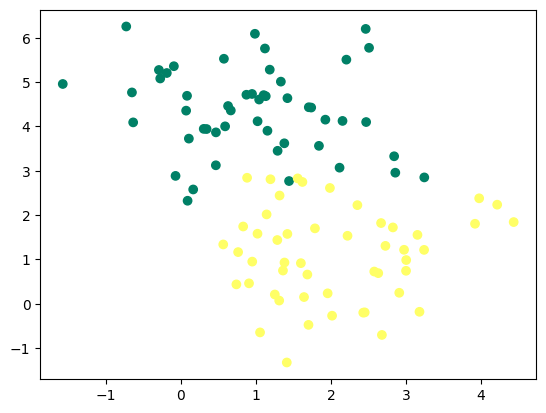

(100, 2)
(100, 1)


In [2]:
X , y = make_blobs(n_samples = 100 , n_features = 2 , centers = 2 , random_state = 0)
y = y.reshape(y.shape[0] , 1)

plt.scatter(X[: , 0] , X[: , 1] , c = y , cmap = 'summer')
plt.show()

print(X.shape)
print(y.shape)

In [3]:
#Initialisation
def initialisation(X):
    W = np.random.randn(X.shape[1] , 1)
    b = np.random.randn(1)
    return (W , b)

In [4]:
W , b = initialisation(X)
W.shape

(2, 1)

In [5]:
#model
def model(X , W , b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [6]:
A = model(X , W , b)
A.shape

(100, 1)

In [7]:
#Fonction coût
def log_loss(A , y):
    m = len(y)
    return 1 / m * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

In [8]:
log_loss(A , y)

1.4926801491213748

In [9]:
#Gradients
def grad(X , A , y):
    m = len(y)
    dW = 1 / m * np.dot(X.T , (A - y))
    db = 1 / m * np.sum(A - y)
    return(dW , db)

In [10]:
dW , db = grad(X , A , y)
dW.shape

(2, 1)

In [11]:
#Mise à jour
def update(dW, db , W , b , learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W , b)

In [36]:
#Prediction
def predict(X ,W , b):
    A = model(X ,W , b)
    print(A) #Probabilité
    return A >= 0.5 #Fonction Sigmoid

In [37]:
#Neurone artificiel
def neuron(X , y , learning_rate , n_iter):
    #Initialisation
    W , b = initialisation(X)

    loss = []

    #Training
    for i in range(n_iter):
        A = model(X , W , b)
        loss.append(log_loss(A , y))
        dW , db = grad(X , A , y)
        W , b = update(dW, db , W , b , learning_rate)

    y_pred = predict(X , W , b)
    print(accuracy_score(y , y_pred))

    plt.plot(loss)
    plt.show()
    
    return (W , b)

[[9.80218067e-01]
 [9.37515537e-01]
 [1.23788294e-03]
 [1.79746210e-01]
 [9.87865881e-01]
 [3.65814488e-01]
 [3.26324514e-02]
 [9.66123894e-01]
 [2.30832354e-02]
 [9.72803296e-01]
 [1.12276986e-02]
 [9.66512444e-01]
 [5.65829248e-03]
 [6.60340228e-03]
 [8.47205043e-01]
 [9.92255104e-01]
 [9.98778108e-01]
 [1.77868486e-02]
 [9.26489858e-01]
 [8.20809710e-01]
 [1.45544621e-02]
 [1.39168303e-02]
 [4.61775147e-01]
 [1.12161393e-03]
 [9.87695244e-01]
 [9.95211628e-03]
 [9.79878488e-01]
 [1.10928297e-03]
 [2.25191187e-02]
 [8.23578657e-01]
 [9.96927495e-01]
 [1.47915943e-02]
 [8.72885548e-01]
 [9.96970565e-01]
 [4.28572984e-01]
 [1.23895055e-01]
 [9.24849152e-01]
 [6.01693911e-01]
 [4.48874346e-01]
 [6.83948816e-01]
 [6.41261063e-02]
 [1.31217853e-02]
 [9.37396354e-05]
 [1.10593585e-01]
 [1.99352415e-01]
 [9.27794794e-01]
 [9.95363126e-01]
 [9.95134488e-01]
 [1.30881133e-03]
 [1.71131479e-03]
 [9.88249313e-01]
 [7.89075433e-01]
 [6.02786164e-03]
 [1.07832900e-02]
 [8.33663946e-01]
 [1.349769

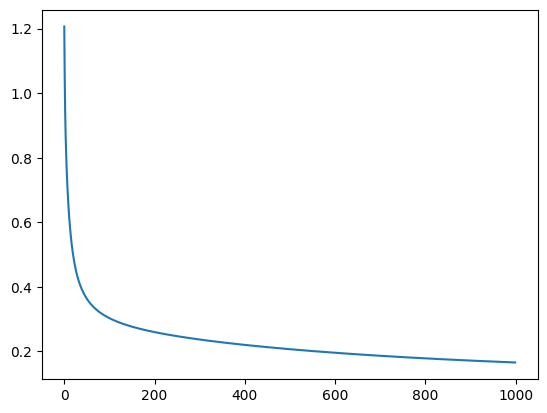

In [38]:
W , b = neuron(X , y , learning_rate = 0.1 , n_iter = 1000)

In [39]:
W , b

(array([[ 1.27589322],
        [-1.70733979]]),
 array([2.33517029]))

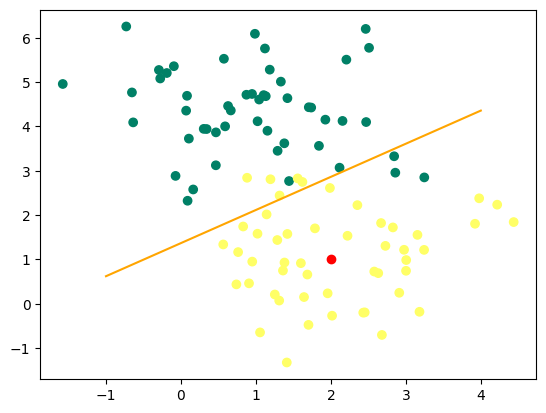

[0.96005998]


array([ True])

In [42]:
#Test sur un donnée futur
new = np.array([2 , 1])

#Frontière de décision
x0 = np.linspace(-1 , 4)
x1 = (-W[0]*x0 - b) / W[1]

plt.plot(x0 , x1 , c = 'orange')


plt.scatter(X[: , 0] , X[: , 1] , c = y , cmap = 'summer')
plt.scatter(new[0] , new[1] , c = 'r')
plt.show()

predict(new , W , b)